# Jessica Williams Capstone Project-Data Wrangling

Notebook Summary:

This dataset includes information about the amount of time, nutritional facts, steps, ingredients, as well as the recipe contributor. It also includes user ratings and interactions (comments) about the recipes. These attributes are available in 5 different files. In this notebook I will inspect and clean the different data files. I will also try to get some idea of which columns can be useful in finding features of highly rated recipes. My goal is to have all of these possible features presented in one dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from yellowbrick.text import FreqDistVisualizer
from pathlib import Path
nlp=spacy.load('en_core_web_sm')

#might need later: from sb_utils import save_file

My first step was to go through all of the data file provided and take a look at the columns and information they provide.

In [2]:
#upload the ingredient map pickle file

ingredients= pd.read_pickle('ingr_map.pkl')

In [3]:
ingredients.head(20)

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
5,head romaine lettuce,3,head romaine lettuce,20,lettuce,4507,4308
6,curly endive lettuce,3,curly endive lettuce,20,lettuce,4507,4308
7,romaine lettuce hearts,3,romaine lettuce heart,21,lettuce,4507,4308
8,baby leaf lettuce,3,baby leaf lettuce,17,lettuce,4507,4308
9,head of lettuce,3,head of lettuce,15,lettuce,4507,4308


In [4]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11659 entries, 0 to 11658
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raw_ingr   11659 non-null  object
 1   raw_words  11659 non-null  int64 
 2   processed  11659 non-null  object
 3   len_proc   11659 non-null  int64 
 4   replaced   11659 non-null  object
 5   count      11659 non-null  int64 
 6   id         11659 non-null  int16 
dtypes: int16(1), int64(3), object(3)
memory usage: 660.4+ KB


The ingredients file contains all of the ingredients listed in the recipes. It categorizes the specific ingredients into broader categories ( i.e. bib lettuce, romaine lettuce, butter lettuce all become lettuce). The category is then given a standard name and Id number. The columns are ‘raw_ingr’, ‘raw_words’, ‘processed’, ‘len_proc’, ‘replaced’, ‘count’, and ‘id’ (7 columns). I could possibly pull the ingredient name and id number into the main data set.

In [5]:
raw_recipes = pd.read_csv('RAW_recipes.csv')

In [6]:
raw_recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [7]:
raw_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


The raw_recipes file contains the raw recipe information for all of the recipes. The columns are ‘name’, ‘id’, ‘minutes’, ‘contributor_id’, ‘submitted’, ‘tags’, ‘nutrition’, ‘n_steps’, ‘steps’, ‘description’, ‘ingredients’, ‘n_ingredients’ (12 columns). Plan to use the name column, id column, minutes column, number of steps column, and number of ingredients column.

In [8]:
coded_recipes = pd.read_csv('PP_recipes.csv')

In [9]:
coded_recipes.head(20)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
5,465171,111231,"[40480, 3390, 829, 35873, 7047, 13731, 2640, 1...","[[13731, 30684, 260, 245, 17843, 25592, 10601]...","[40480, 40482, 7087, 13731, 30684, 260, 245, 5...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[6861, 7655, 6846, 6906, 1789, 131, 6863, 1833..."
6,163861,85356,"[40480, 1966, 488, 5218, 252, 5867, 10994, 118...","[[31801, 12395, 25808], [17918], [6953], [1133...","[40480, 40482, 604, 704, 15110, 244, 15684, 24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[5574, 2683, 6270, 5319, 2499, 869, 1278, 4987..."
7,186383,105140,"[40480, 5317, 7, 491, 11274, 5639, 40481]","[[17918], [25916], [15473, 8361], [15473, 1016...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 332, 335, 6270, 800, 4987, 7470, ..."
8,116395,8671,"[40480, 16190, 13249, 4914, 5639, 40481]","[[17918], [36374, 3388, 650, 256, 6444], [2361...","[40480, 40482, 19093, 271, 40478, 40482, 23667...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,"[2683, 1689, 5687, 1098, 840, 7782, 7011, 1910..."
9,303460,160334,"[40480, 1287, 7912, 504, 22118, 19276, 831, 47...","[[559, 1164, 6020], [511, 532, 543, 241], [664...","[40480, 40482, 14259, 1055, 11, 4364, 488, 827...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[6413, 7997, 3148, 3710, 1799, 2007, 3203, 265..."


In [10]:
coded_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178265 entries, 0 to 178264
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 178265 non-null  int64 
 1   i                  178265 non-null  int64 
 2   name_tokens        178265 non-null  object
 3   ingredient_tokens  178265 non-null  object
 4   steps_tokens       178265 non-null  object
 5   techniques         178265 non-null  object
 6   calorie_level      178265 non-null  int64 
 7   ingredient_ids     178265 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.9+ MB


The coded recipes file contains number tokens or id numbers for most of the columns in the raw recipes. The columns are ‘id’, ‘i’, ‘name_tokens’, ‘ingredient_tokens’, ‘steps_tokens’, ‘techniques’, ‘calorie_level’, ‘ingredient_ids’ (8 columns). This file essentially uses numbers to categorize some of the different attributes of each recipe. Maybe useful to include the calorie level, or step token columns.

In [11]:
raw_interactions = pd.read_csv('Raw_interactions.csv')

In [12]:
raw_interactions.head(20)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


In [13]:
raw_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


The raw_interactions file contains different elements of the user interactions for the recipes. The columns are ‘user_id’, ‘recipe_id’, ‘date’, ‘rating’, ‘review’ (5 columns).  I will most likely use the rating column and the review column.

In [14]:
user_profile = pd.read_csv('PP_users.csv')

In [15]:
user_profile.head(20)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
5,5,"[96, 2, 0, 38, 71, 0, 3, 9, 1, 90, 12, 13, 0, ...","[122026, 57553, 176588, 64777, 22746, 13097, 1...",290,"[4.0, 4.0, 1.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, ...",290
6,6,"[2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[64490, 3, 98141, 49558]",4,"[5.0, 5.0, 5.0, 5.0]",4
7,7,"[6, 0, 0, 2, 1, 0, 0, 1, 0, 5, 1, 0, 0, 0, 0, ...","[12938, 43057, 84375, 105841, 62768, 155858, 1...",16,"[0.0, 5.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16
8,8,"[87, 1, 0, 33, 49, 0, 0, 8, 2, 95, 1, 4, 0, 1,...","[139822, 28774, 149235, 127227, 73843, 68663, ...",232,"[4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...",232
9,9,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[116193, 3, 20238, 9967, 11115, 96404]",6,"[4.0, 5.0, 5.0, 3.0, 5.0, 5.0]",6


In [16]:
user_profile.info

<bound method DataFrame.info of            u                                         techniques  \
0          0  [8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...   
1          1  [11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...   
2          2  [13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...   
3          3  [498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...   
4          4  [161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...   
...      ...                                                ...   
25071  25071  [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
25072  25072  [1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
25073  25073  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
25074  25074  [2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   
25075  25075  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                   items  n_items  \
0      [1118, 27680, 32541, 137353, 16428, 28815, 658...       31   
1      [122140, 77036, 15

The user_profile file contains a more detailed profile of the users that rated the recipes. The columns included are ‘u’(for user id#), ‘techniques’(cooking techniques encountered by user), ‘items’(recipes interacted with by recipe id#), ‘n_items’( number of recipes user interacted with), ‘ratings’ ( list of ratings the user gave the recipes they interacted with), ‘n_ratings’(number of rating the user gave) ( 6 columns). I could possibly use the n_ratings column and the user id# for the data set.

Next I would like to take a look at some of the text data and examine the frequency of certain words and phrases. The columns I think would be the most helpful are the steps, tags, review and ingredients columns.

First I will take a look at the steps column. For the steps frequency count I thought the best ngram range to focus on would be 4, as the steps will be longer phrases and this range will give a good amount of full steps or at least the best idea of the direction that the steps are going in.

In [17]:
step_vectorizer=CountVectorizer(stop_words='english', ngram_range=(1,1), min_df=0.1,max_df=0.75)
step_docs=step_vectorizer.fit_transform(raw_recipes['steps'])
step_features=pd.DataFrame(step_docs.todense(), columns=step_vectorizer.get_feature_names_out())


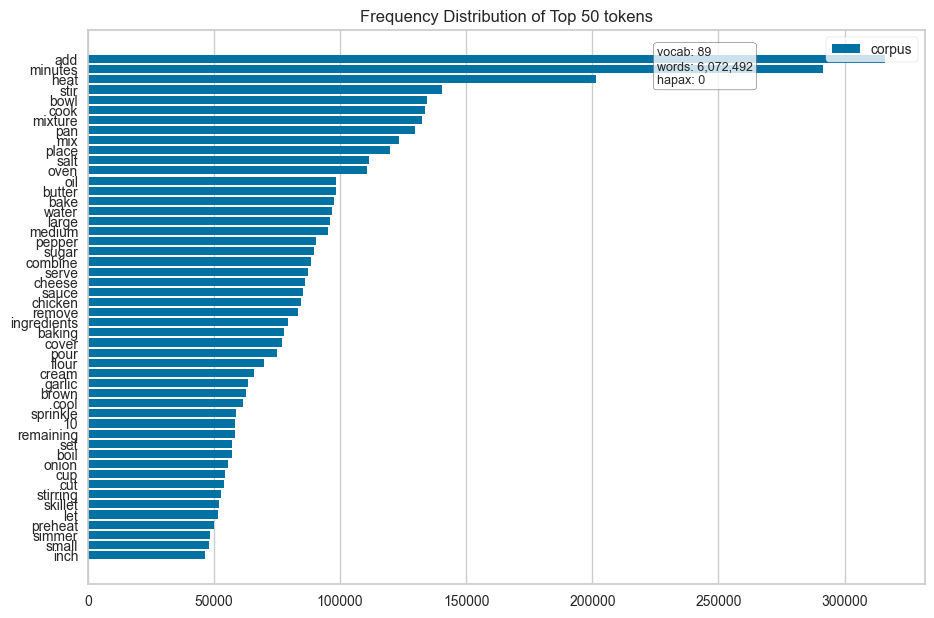

<AxesSubplot: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [19]:
step_visualizer = FreqDistVisualizer(features=step_vectorizer.get_feature_names_out(), size=(1080, 720))
step_visualizer.fit(step_docs)
step_visualizer.show()

Not a ton of useful information here yet. I can see that the more frequently listed steps for the recipes are things about oven temperature, stovetop temperature, adding some of the more widely used ingredients and what tools to use. This information may come in handy when looking at features of the most highly rated recipes later on in data analysis.

For the tags frequency count I thought the best ngram range to focus on would be 3 to try to capture the idea of most of the tags.

In [20]:
tag_vectorizer=CountVectorizer(stop_words='english', ngram_range=(1,1), min_df=0.1,max_df=0.75)
tag_docs= tag_vectorizer.fit_transform(raw_recipes['tags'])
tag_features=pd.DataFrame(tag_docs.todense(),columns=tag_vectorizer.get_feature_names_out())

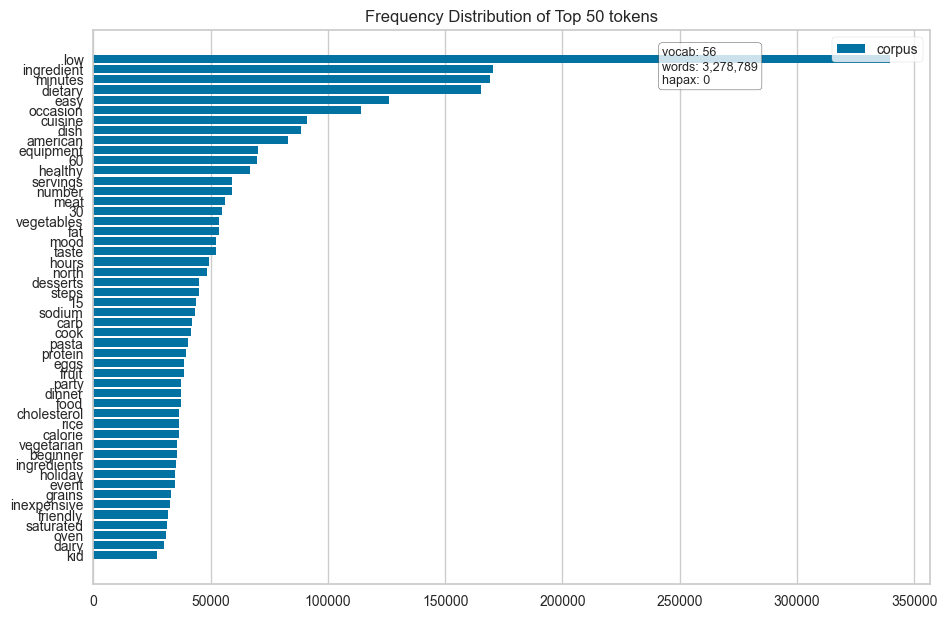

<AxesSubplot: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [22]:
tag_visualizer = FreqDistVisualizer(features=tag_vectorizer.get_feature_names_out(), size=(1080, 720))
tag_visualizer.fit(tag_docs)
tag_visualizer.show()

From this frequency we get a general idea of the type of tags that are included for the recipes. They cover things like length of time to make, dietary restrictions, type of cuisine, calories etc. 

Next I want to take a look at the review column. I would like to try an ngram range of 2.

In [23]:
raw_interactions['review']=raw_interactions['review'].fillna(' ')

In [24]:
raw_interactions['review'].isnull().sum()

0

In [25]:
rview_vectorizer=CountVectorizer(stop_words='english', ngram_range=(2,2))
rview_docs= rview_vectorizer.fit_transform(raw_interactions['review'])
rview_features=rview_vectorizer.get_feature_names_out()

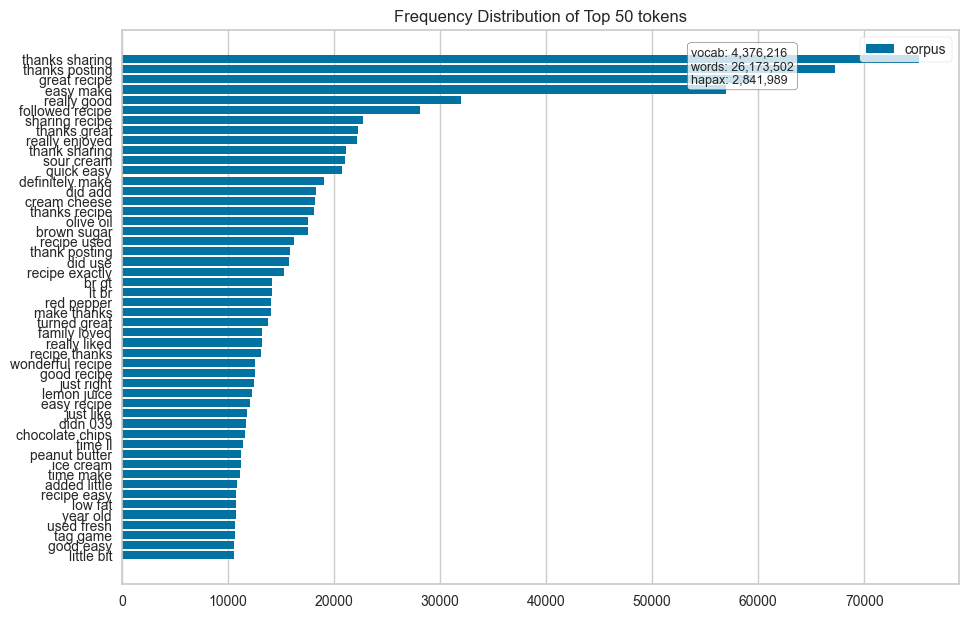

<AxesSubplot: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [26]:
rview_visualizer = FreqDistVisualizer(features=rview_features, size=(1080, 720))
rview_visualizer.fit(rview_docs)
rview_visualizer.show()

It looks like this ngram range pulls out a few interesting features. This gives a range of phrases that include both ingredients, recipe attributes, and ratings. This could be useful information to look at in EDA.

Next I will take a look at the ingredients column. 

ngram range (1,1)

In [27]:
ingr_vectorizer=CountVectorizer(stop_words='english', ngram_range=(1,1), min_df=0.05,max_df=0.75)
ingr_docs= ingr_vectorizer.fit_transform(raw_recipes['ingredients'])
ingr_features=pd.DataFrame(ingr_docs.todense(),columns=ingr_vectorizer.get_feature_names_out())

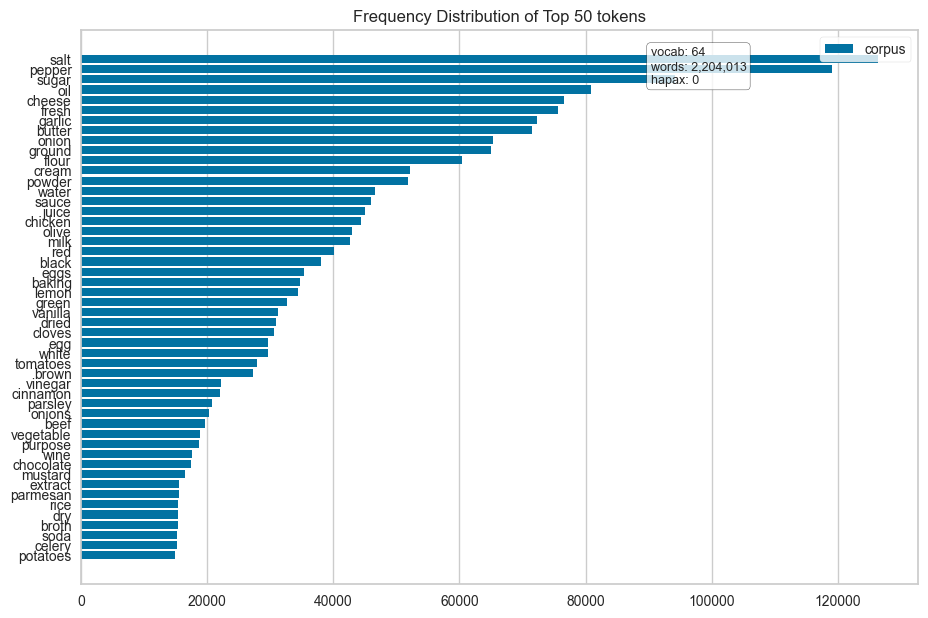

<AxesSubplot: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [28]:
ingr_visualizer = FreqDistVisualizer(features=ingr_vectorizer.get_feature_names_out(), size=(1080, 720))
ingr_visualizer.fit(ingr_docs)
ingr_visualizer.show()

After applying an ngram range of (1,1) I observed a few things. Some of the ingredients that show up in the top 50 in every range are salt, pepper, and oil, and flour. I feel like this was to be expected when looking at a list of recipes as these are generally very common in cooking. 

Overall I think it wold be very helpful to examine some of these features in the exploratory data analysis phase after gathering which recipes have the highest ratings and interactions. It could help better understand the features that each recipe contains.

After looking at all of the data I know I will want add columns from a few of the data files into one data frame. This means I will need to form a couple of different joins. From my observations so far, I think I will want the most columns from the raw_recipes data frame. This is what I will use as the base of my data set and therefore I will be begin with exploring and editing this dataset.

In [29]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [30]:
raw_recipes.shape

(231637, 12)

In [31]:
raw_recipes.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Looking at the data types for this dataframe we can see that all of the string variables are correctly listed as objects and the numeric values are listed as integers. For anticipated future data analysis, I think that I should change a few specific columns to float data types. I am going to convert the minutes, number of steps and number of ingredients columns to float data types. We can also see that the submitted column, which lists the dates that the recipes were added to the site, is listed as an object variable. Since this column contains dates, let’s convert this into a date time variable.

In [32]:
raw_recipes=raw_recipes.astype({'minutes':'float','n_steps':'float', 'n_ingredients':'float'})

In [33]:
raw_recipes['submitted']= pd.to_datetime(raw_recipes['submitted'])

In [34]:
raw_recipes.dtypes

name                      object
id                         int64
minutes                  float64
contributor_id             int64
submitted         datetime64[ns]
tags                      object
nutrition                 object
n_steps                  float64
steps                     object
description               object
ingredients               object
n_ingredients            float64
dtype: object

Next I will check for null values.

In [35]:
raw_recipes.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [36]:
raw_recipes['name'].isna().sum()

1

In [37]:
print(raw_recipes[raw_recipes['name'].isnull()])

    name      id  minutes  contributor_id  submitted  \
721  NaN  368257     10.0          779451 2009-04-27   

                                                  tags  \
721  ['15-minutes-or-less', 'time-to-make', 'course...   

                                         nutrition  n_steps  \
721  [1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]      6.0   

                                                 steps    description  \
721  ['in a bowl , combine ingredients except for o...  -------------   

                                           ingredients  n_ingredients  
721  ['lemon', 'honey', 'horseradish mustard', 'gar...           10.0  


After checking for null values it appears that there are two columns with missing values. The first column is the name column. Being that the id# will be used to identify the recipe throughout data analysis I believe it is okay to leave a null value for the name of this recipe. The other column with missing values in the description column. This column contains an overall description or summary about the recipe given by the recipe contributor. Because I anticipate most likely dropping this column in the long run I think that these null values don’t need to be dealt with right now.

Next I will check the id column for any duplicate values.

In [38]:
raw_recipes['id'].value_counts()

137739    1
424135    1
8519      1
3389      1
84560     1
         ..
74884     1
273818    1
427020    1
71033     1
298509    1
Name: id, Length: 231637, dtype: int64

It looks like the id# for the recipes are all unique.

Next I'll direct my attention to the raw_interactions data set as this contains some of the main variables for comparison as well.

In [39]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


Let's take a look at the data types.

In [40]:
raw_interactions.dtypes

user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object

Again, for future analysis I think it would be wise to change the rating column to a float data type. Also, the date column contains date so we will change the datatype to datetime.

In [41]:
raw_interactions=raw_interactions.astype({'rating':'float'})

In [42]:
raw_interactions['date']= pd.to_datetime(raw_interactions['date'])

In [43]:
raw_interactions.dtypes

user_id               int64
recipe_id             int64
date         datetime64[ns]
rating              float64
review               object
dtype: object

Let's take a look at the null values for this dataframe.

In [44]:
raw_interactions.isnull().sum()

user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64

From this it looks like the only missing values are in the review columns which is to be expected. I believe the range of the rating column is 0-5 but I would like to check to be sure.

In [45]:
print(raw_interactions['rating'].min())
print(raw_interactions['rating'].max())

0.0
5.0


Next I would like to organize the recipe_id column by id# in ascending order. This will help with viewing and joining the data columns in the long run.

In [46]:
raw_interactions.sort_values('recipe_id',ascending=True)


,user_id,recipe_id,date,rating,review
110594,1060485,38,2009-01-15,4.0,very good!! the directions were alittle weird ...
110595,1802956262,38,2014-07-22,4.0,This does taste great! I think the recipe need...
110596,2123645,38,2014-08-14,4.0,Tasty and refreshing! I love the creamy flavor...
110593,596506,38,2008-02-13,5.0,"Yummy, yummy, yummy! I am a big fan of fruit a..."
13353,393254,39,2007-01-20,3.0,I have an Indian friend who made this dish for...
...,...,...,...,...,...
132591,305531,537459,2018-11-13,5.0,Yum. What's not to like with this one. It was ...
1038794,2001297534,537485,2018-11-17,5.0,I made this recipe as written. It was easy to ...
738515,2002102502,537543,2018-12-15,0.0,I Didn't see pumpkin puree in ingredients just...
431814,2002326807,537671,2018-12-15,0.0,"These are an absolute work of art, but just to..."


In [47]:
print(raw_interactions['recipe_id'].value_counts()[38])

4


My goal with joining the first to data frames is to get the mean of the rating column grouped by recipe id. In other words find the mean of the ratings for each recipe and then apply it to the recipe data frame by id#. Looking at the value counts for the recipe id# in both data frames I can see that they contain the same number of unique values in each column. This mean that there is at list some rating data for all recipe ids. Now let’s calculate the mean rating.

In [48]:
raw_interactions.set_index('recipe_id')

,user_id,date,rating,review
recipe_id,,,,
40893,38094,2003-02-17,4.0,Great with a salad. Cooked on top of stove for...
40893,1293707,2011-12-21,5.0,"So simple, so delicious! Great for chilly fall..."
44394,8937,2002-12-01,4.0,This worked very well and is EASY. I used not...
85009,126440,2010-02-27,5.0,I made the Mexican topping and took it to bunk...
85009,57222,2011-10-01,5.0,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...
72730,116593,2003-12-09,0.0,Another approach is to start making sauce with...
386618,583662,2009-09-29,5.0,These were so delicious! My husband and I tru...
78003,157126,2008-06-23,5.0,WOW! Sometimes I don't take the time to rate ...


In [49]:
raw_interactions['rating_mean'] = raw_interactions['rating'].groupby(raw_interactions['recipe_id']).transform('mean')

In [50]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review,rating_mean
0,38094,40893,2003-02-17,4.0,Great with a salad. Cooked on top of stove for...,4.5
1,1293707,40893,2011-12-21,5.0,"So simple, so delicious! Great for chilly fall...",4.5
2,8937,44394,2002-12-01,4.0,This worked very well and is EASY. I used not...,4.0
3,126440,85009,2010-02-27,5.0,I made the Mexican topping and took it to bunk...,5.0
4,57222,85009,2011-10-01,5.0,"Made the cheddar bacon topping, adding a sprin...",5.0


In [51]:
raw_interactions.tail()

,user_id,recipe_id,date,rating,review,rating_mean
1132362,116593,72730,2003-12-09,0.0,Another approach is to start making sauce with...,0.00
1132363,583662,386618,2009-09-29,5.0,These were so delicious! My husband and I tru...,5.00
1132364,157126,78003,2008-06-23,5.0,WOW! Sometimes I don't take the time to rate ...,4.75
1132365,53932,78003,2009-01-11,4.0,Very good! I used regular port as well. The ...,4.75
1132366,2001868099,78003,2017-12-18,5.0,I am so glad I googled and found this here. Th...,4.75


In [52]:
raw_interactions.set_index('recipe_id')

,user_id,date,rating,review,rating_mean
recipe_id,,,,,
40893,38094,2003-02-17,4.0,Great with a salad. Cooked on top of stove for...,4.50
40893,1293707,2011-12-21,5.0,"So simple, so delicious! Great for chilly fall...",4.50
44394,8937,2002-12-01,4.0,This worked very well and is EASY. I used not...,4.00
85009,126440,2010-02-27,5.0,I made the Mexican topping and took it to bunk...,5.00
85009,57222,2011-10-01,5.0,"Made the cheddar bacon topping, adding a sprin...",5.00
...,...,...,...,...,...
72730,116593,2003-12-09,0.0,Another approach is to start making sauce with...,0.00
386618,583662,2009-09-29,5.0,These were so delicious! My husband and I tru...,5.00
78003,157126,2008-06-23,5.0,WOW! Sometimes I don't take the time to rate ...,4.75


The raw interactions data frame now contains a row with the mean rating for each recipe id.  To check the accuracy, lets once again sort the recipe_id column by the values in ascending order. This way we can check that the mean rating is the same for all review rows for a select id#.

In [53]:
raw_interactions.sort_values('recipe_id', ascending=True)

,user_id,recipe_id,date,rating,review,rating_mean
110594,1060485,38,2009-01-15,4.0,very good!! the directions were alittle weird ...,4.25
110595,1802956262,38,2014-07-22,4.0,This does taste great! I think the recipe need...,4.25
110596,2123645,38,2014-08-14,4.0,Tasty and refreshing! I love the creamy flavor...,4.25
110593,596506,38,2008-02-13,5.0,"Yummy, yummy, yummy! I am a big fan of fruit a...",4.25
13353,393254,39,2007-01-20,3.0,I have an Indian friend who made this dish for...,3.00
...,...,...,...,...,...,...
132591,305531,537459,2018-11-13,5.0,Yum. What's not to like with this one. It was ...,5.00
1038794,2001297534,537485,2018-11-17,5.0,I made this recipe as written. It was easy to ...,5.00
738515,2002102502,537543,2018-12-15,0.0,I Didn't see pumpkin puree in ingredients just...,0.00
431814,2002326807,537671,2018-12-15,0.0,"These are an absolute work of art, but just to...",0.00


Next I would like to create a column that counts the number of listed reviews in the review column for each recipe. I created a data frame that contains the review column count for each recipe id.  

In [54]:
review_num=raw_interactions.groupby('recipe_id').size().sort_values(ascending=False).reset_index(name='review_count')
print(review_num.head())

   recipe_id  review_count
0       2886          1613
1      27208          1601
2      89204          1579
3      39087          1448
4      67256          1322


Next, I merged this column into the interactions data frame. 

In [55]:
interactions_new=raw_interactions.merge(review_num,on='recipe_id')
print(interactions_new.head())

   user_id  recipe_id       date  rating  \
0    38094      40893 2003-02-17     4.0   
1  1293707      40893 2011-12-21     5.0   
2     8937      44394 2002-12-01     4.0   
3   126440      85009 2010-02-27     5.0   
4    57222      85009 2011-10-01     5.0   

                                              review  rating_mean  \
0  Great with a salad. Cooked on top of stove for...          4.5   
1  So simple, so delicious! Great for chilly fall...          4.5   
2  This worked very well and is EASY.  I used not...          4.0   
3  I made the Mexican topping and took it to bunk...          5.0   
4  Made the cheddar bacon topping, adding a sprin...          5.0   

   review_count  
0             2  
1             2  
2             1  
3             2  
4             2  


In [56]:
interactions_new.shape

(1132367, 7)

To double check the accuracy of the values, I made sure that the new data frame set the recipe id as the index as well as list the recipe ids in ascending order. This will help us check the review column against the recipe ids and review counts more efficiently.

In [57]:
interactions_final=interactions_new.sort_values('recipe_id', ascending=True)

In [58]:
interactions_final.set_index('recipe_id')

,user_id,date,rating,review,rating_mean,review_count
recipe_id,,,,,,
38,1060485,2009-01-15,4.0,very good!! the directions were alittle weird ...,4.25,4
38,1802956262,2014-07-22,4.0,This does taste great! I think the recipe need...,4.25,4
38,596506,2008-02-13,5.0,"Yummy, yummy, yummy! I am a big fan of fruit a...",4.25,4
38,2123645,2014-08-14,4.0,Tasty and refreshing! I love the creamy flavor...,4.25,4
39,393254,2007-01-20,3.0,I have an Indian friend who made this dish for...,3.00,1
...,...,...,...,...,...,...
537459,305531,2018-11-13,5.0,Yum. What's not to like with this one. It was ...,5.00,1
537485,2001297534,2018-11-17,5.0,I made this recipe as written. It was easy to ...,5.00,1
537543,2002102502,2018-12-15,0.0,I Didn't see pumpkin puree in ingredients just...,0.00,1


It seems to be in order from the examples presented.The recipe id# 38 has a review count of 4 and the number of rows displayed containing a review for recipe id# 38 is 4.

I think that I have organized the data frames that have columns I will find most useful in my analysis(I may comeback to do some analysis of the ingredient map vs. the ingredient column). Now I would like to join the data frames together.

The two dataframes have different column names for the same variable which is the unique id# for each individual recipe. I think it makes the most sense to use the column name ‘recipe_id’, so I will rename the column in the raw recipes dataframe ‘recipe_id’.

In [59]:
raw_recipes2=raw_recipes.rename(columns={'id': 'recipe_id'})
print(raw_recipes2.head())

                                         name  recipe_id  minutes  \
0  arriba   baked winter squash mexican style     137739     55.0   
1            a bit different  breakfast pizza      31490     30.0   
2                   all in the kitchen  chili     112140    130.0   
3                          alouette  potatoes      59389     45.0   
4          amish  tomato ketchup  for canning      44061    190.0   

   contributor_id  submitted  \
0           47892 2005-09-16   
1           26278 2002-06-17   
2          196586 2005-02-25   
3           68585 2003-04-14   
4           41706 2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps 

In [60]:
recipe_interactions = pd.merge(raw_recipes2, interactions_final[['recipe_id','rating_mean','review_count']], on=['recipe_id'])

In [61]:
recipe_interactions.shape

(1132367, 14)

In [62]:
recipe_interactions.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating_mean,review_count
0,arriba baked winter squash mexican style,137739,55.0,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11.0,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7.0,5.0,3
1,arriba baked winter squash mexican style,137739,55.0,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11.0,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7.0,5.0,3
2,arriba baked winter squash mexican style,137739,55.0,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11.0,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7.0,5.0,3
3,a bit different breakfast pizza,31490,30.0,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9.0,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6.0,3.5,4
4,a bit different breakfast pizza,31490,30.0,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9.0,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6.0,3.5,4


Lastly I want to add some of the language features that I pulled from the recipes. I think it would be useful to add the step features, tag features and ingredient features to the final dataframe.

First let's add the steps information.

In [63]:
recipe_attributes=pd.concat([recipe_interactions, step_features], axis=1)

In [64]:
recipe_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Columns: 103 entries, name to water
dtypes: datetime64[ns](1), float64(93), int64(3), object(6)
memory usage: 898.5+ MB


Next let's add the tag information.

In [65]:
recipe_attributes=pd.concat([recipe_attributes, tag_features], axis=1)

In [66]:
recipe_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Columns: 159 entries, name to vegetarian
dtypes: datetime64[ns](1), float64(149), int64(3), object(6)
memory usage: 1.3+ GB


Finally let's add the ingredient information.

In [67]:
recipe_attributes=pd.concat([recipe_attributes, ingr_features], axis=1)

In [68]:
recipe_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Columns: 223 entries, name to wine
dtypes: datetime64[ns](1), float64(213), int64(3), object(6)
memory usage: 1.9+ GB


In [69]:
print(recipe_attributes.head())

                                         name  recipe_id  minutes  \
0  arriba   baked winter squash mexican style     137739     55.0   
1  arriba   baked winter squash mexican style     137739     55.0   
2  arriba   baked winter squash mexican style     137739     55.0   
3            a bit different  breakfast pizza      31490     30.0   
4            a bit different  breakfast pizza      31490     30.0   

   contributor_id  submitted  \
0           47892 2005-09-16   
1           47892 2005-09-16   
2           47892 2005-09-16   
3           26278 2002-06-17   
4           26278 2002-06-17   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['60-minutes-or-less', 'time-to-make', 'course...   
2  ['60-minutes-or-less', 'time-to-make', 'course...   
3  ['30-minutes-or-less', 'time-to-make', 'course...   
4  ['30-minutes-or-less', 'time-to-make', 'course...   

                                   nutrition  n_steps  

In [70]:
print(recipe_attributes.tail())

                                                 name  recipe_id  minutes  \
1132362                     zydeco ya ya deviled eggs     308080     40.0   
1132363        cookies by design   cookies on a stick     298512     29.0   
1132364  cookies by design   sugar shortbread cookies     298509     20.0   
1132365  cookies by design   sugar shortbread cookies     298509     20.0   
1132366  cookies by design   sugar shortbread cookies     298509     20.0   

         contributor_id  submitted  \
1132362           37779 2008-06-07   
1132363          506822 2008-04-15   
1132364          506822 2008-04-15   
1132365          506822 2008-04-15   
1132366          506822 2008-04-15   

                                                      tags  \
1132362  ['60-minutes-or-less', 'time-to-make', 'course...   
1132363  ['30-minutes-or-less', 'time-to-make', 'course...   
1132364  ['30-minutes-or-less', 'time-to-make', 'course...   
1132365  ['30-minutes-or-less', 'time-to-make', 'course...  

Conclusion:

We now have a final dataframe(recipe_attributes) contains 17 columns. We created a few additional variable columns using information in the dataset. In the next phase we will be able to look at relationships between some of the recipe attributes in the dataframe.